In [1]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))
])

voting_clf.fit(X,y)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [3]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'{name} = {clf.score(X_test,y_test)}')

lr = 0.848
rf = 1.0
svc = 0.912


random forest is overfitted if added more testing data it would surely fail

In [4]:
voting_clf.predict(X_test[:1])

array([1], dtype=int64)

In [5]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]

In [6]:
voting_clf.score(X_test, y_test)

0.944

In [7]:
voting_clf.voting = 'soft'
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, n_estimators=500, max_samples=100, random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [9]:
bag_clf.score(X_test, y_test)

0.904

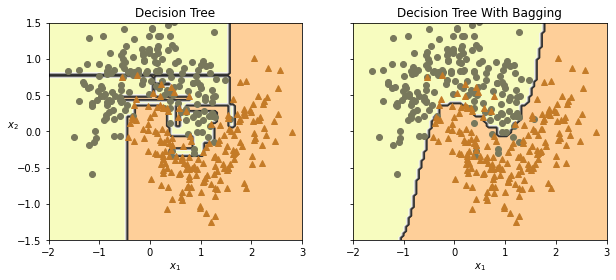

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def decision_boundary(clf, X, y, alpha=1.0):
    axes = [-2, 3, -1.5, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                        np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.4 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, alpha=0.9 * alpha, cmap='Greys')
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
decision_boundary(voting_clf, X_train, y_train)
plt.title("Decision Tree With Bagging")
plt.ylabel("")
plt.show()

In [11]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, oob_score=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.896

In [12]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.92

In [13]:
bag_clf.oob_decision_function_[:3]

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

In [14]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.912

In [15]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)

for score, name  in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score,3), name)

0.112 sepal length (cm)
0.023 sepal width (cm)
0.441 petal length (cm)
0.423 petal width (cm)


In [16]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

X_mnist.shape

(70000, 784)

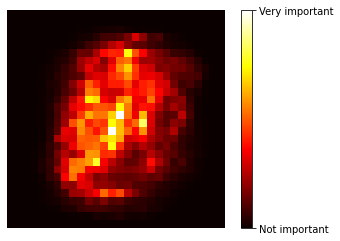

In [17]:
feat_impor = rnd_clf.feature_importances_.reshape(28,28)
plt.imshow(feat_impor, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                            rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.axis('off')
plt.show()

In [18]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=25, learning_rate=0.5, random_state=42
)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=25, random_state=42)

In [19]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

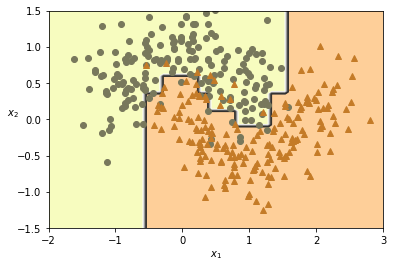

In [20]:
decision_boundary(ada_clf, X_train, y_train)

# Gradient Boosting #
### Doing gradient Boosting to see the difference from ada boosting ###

ada relies on tweaking the instance weight at every iteration

Gradient Boosting fits the new predictor from the residual error of the last predictor

In [21]:

from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [22]:
#making second predictor

y2 = y - tree_reg.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [23]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [24]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

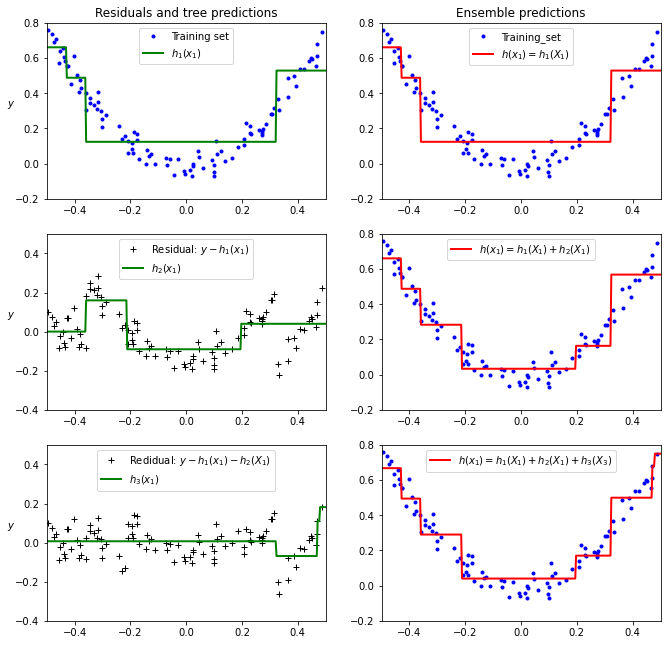

In [42]:
def plot_predictions(regressors, X, y, axes, style, label=None, data_style='b.', data_label=None):
    X1 = np.linspace(axes[0],[1], 500)
    y_pred = sum(reg.predict(X1.reshape(-1,1)) for reg in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(X1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style='g-', label='$h_1(x_1)$', data_label="Training set")
plt.ylabel("$y$", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(3, 2, 2)
plot_predictions([tree_reg], X, y, axes=[-0.5,0.5, -0.2, 0.8], style='r-', label='$h(x_1) = h_1(X_1)$', data_label="Training_set")
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.4, 0.5], style='g-', label='$h_2(x_1)$', data_label="Residual: $y-h_1(x_1)$", data_style="k+")
plt.ylabel("$y$", rotation=0)

plt.subplot(3,2,4)
plot_predictions([tree_reg, tree_reg2], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style='r-', label='$h(x_1) = h_1(X_1) + h_2(X_1)$')

plt.subplot(3,2,5)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.4, 0.5], style='g-', label="$h_3(x_1)$", data_label="Redidual: $y - h_1(x_1) - h_2(X_1)$", data_style="k+")
plt.ylabel("$y$", rotation=0)

plt.subplot(3,2,6)
plot_predictions([tree_reg, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style='r-', label='$h(x_1) = h_1(X_1) + h_2(X_1) + h_3(X_3)$')




In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_best = GradientBoostingRegressor(max_depth=2, learning_rate=0.05, n_estimators=500,
                                n_iter_no_change=10, random_state=42)
gbrt_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [49]:
gbrt_best.n_estimators_

92

In [50]:
gbrt = GradientBoostingRegressor(max_depth=2, learning_rate=1, n_estimators=3, random_state=43)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3,
                          random_state=43)

Text(0.5, 0, '$x_1$')

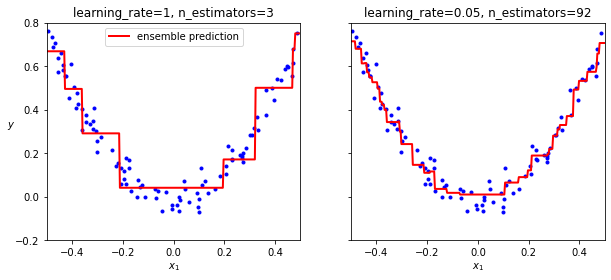

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4),sharey=True)

plt.sca(axes[0])

plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style='r-', label="ensemble prediction")
plt.title(f"learning_rate={gbrt.learning_rate}, " f"n_estimators={gbrt.n_estimators_}")
plt.ylabel("$y$", rotation=0)
plt.xlabel("$x_1$")

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style='r-')
plt.title(f"learning_rate={gbrt_best.learning_rate}, " f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")

In [56]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

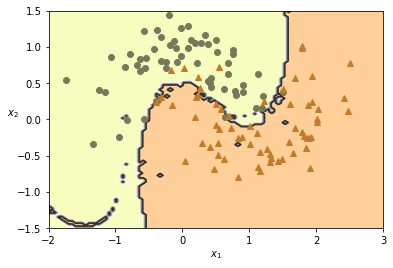

In [58]:
decision_boundary(stacking_clf, X_test, y_test)

In [59]:
stacking_clf.score(X_test, y_test)

0.928